# Agriculture Production Optimization Engine
### Problem Statement:- Build a predictive model so as to suggest the most suitable crops to grow based on the available climatic and soil conditions.

### Goal:- Achieve precision farming by optimizing the agriculture production.

__This Project Is Intended On Precision farming__
- We have to optimize productivity
- By understanding requirements of climatic and soil conditions for crops.
- Helps us to cope up with weather unpredictability.

In [172]:
pip install ipywidgets

In [162]:
# For manupilations
import pandas as pd 
import numpy as np

# For data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For interactivity
from ipywidgets import interact
%matplotlib inline

In [166]:
# Let's read the dataset
data=pd.read_csv('data.csv')

In [93]:
# Let's check the shape of dataset
print('shape of the dataset:',data.shape)

shape of the dataset: (2200, 8)


In [94]:
# Let's check the head of the dataset
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Exploratary Analysis

In [95]:
# Let's check if there is any missing value present in the dataset
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

There is no missing values but if any dataset have missing values then follow these steps:-
- Fill-NA function is used to replace these missing values such as mean,median or mode.
- NA means Not Available
- Pandas have functions like fill-NA to treat missing values
- If in your dataset have any numerical column with missing value then you can use mean value to replace missing values.
- If in your datset have any categorical column with missing values then you can use mode value to replace missing values.
- If in your data have so many outliers so you can use median value.

In [96]:
# Let's check the crops present in this dataset
data['label'].value_counts()

mango          100
apple          100
papaya         100
jute           100
maize          100
grapes         100
mothbeans      100
cotton         100
muskmelon      100
orange         100
lentil         100
pomegranate    100
banana         100
pigeonpeas     100
watermelon     100
rice           100
coffee         100
coconut        100
mungbean       100
blackgram      100
chickpea       100
kidneybeans    100
Name: label, dtype: int64

In [97]:
# Let's check the summary for all the crops
print('Average ratio of nitrogen in the soil : {0:.2f}'.format(data['N'].mean()))
print('Average ratio of phosphorous in the soil : {0:.2f}'.format(data['P'].mean()))
print('Average ratio of potassium in the soil: {0:.2f}'.format(data['K'].mean()))
print('Average tempature in celsius : {0:.2f}'.format(data['temperature'].mean()))
print('Average relative humidity in : {0:.2f}'.format(data['humidity'].mean()))
print('Average ph value of the soil : {0:.2f}'.format(data['ph'].mean()))
print('Average rainfall in mm : {0:.2f}'.format(data['rainfall'].mean()))

Average ratio of nitrogen in the soil : 50.55
Average ratio of phosphorous in the soil : 53.36
Average ratio of potassium in the soil: 48.15
Average tempature in celsius : 25.62
Average relative humidity in : 71.48
Average ph value of the soil : 6.47
Average rainfall in mm : 103.46


I am using here simply mean function to know about average climatic conditions and soil requirements.

In [98]:
# Let's check the summary statistics  for each of the class
@interact
def summary(crops = list(data['label'].value_counts().index)):
    x=data[data['label']==crops]
    print('-----------------------------------------------')
    print("statistics for nitrogen")
    print('Minimum nitrogen required:',x['N'].min())
    print('Average nitrogen required:',x['N'].mean())
    print('Maximum nitrogen required:',x['N'].max())
    print('-----------------------------------------------')
    print("statistics for phosphorous")
    print('Minimum phosphorous required:',x['P'].min())
    print('Average phosphorous required:',x['P'].mean())
    print('Maximum phosphorous required:',x['P'].max())
    print('-----------------------------------------------')
    print("statistics for potassium")
    print('Minimum potassium required:',x['K'].min())
    print('Average potassium required:',x['K'].mean())
    print('Maximum potassium required:',x['K'].max())
    print('-----------------------------------------------')
    print("statistics for temperature")
    print('Minimum temperature required: {0:.2f}'.format(x['temperature'].min()))
    print('Average temperature required: {0:.2f}'.format(x['temperature'].mean()))
    print('Maximum temperature required: {0:.2f}'.format(x['temperature'].max()))
    print('-----------------------------------------------')
    print("statistics for humidity")
    print('Minimum humidity required: {0:.2f}'.format(x['humidity'].min()))
    print('Average humidity required: {0:.2f}'.format(x['humidity'].mean()))
    print('Maximum humidity required: {0:.2f}'.format(x['humidity'].max()))
    print('-----------------------------------------------')
    print("statistics for ph")
    print('Minimum ph required: {0:.2f}'.format(x['ph'].min()))
    print('Average ph required: {0:.2f}'.format(x['ph'].mean()))
    print('Maximum ph required: {0:.2f}'.format(x['ph'].max()))
    print('-----------------------------------------------')
    print("statistics for rainfall")
    print('Minimum rainfall required: {0:.2f}'.format(x['rainfall'].min()))
    print('Average rainfall required: {0:.2f}'.format(x['rainfall'].mean()))
    print('Maximum rainfall required: {0:.2f}'.format(x['rainfall'].max()))
    
    
    
    

interactive(children=(Dropdown(description='crops', options=('mango', 'apple', 'papaya', 'jute', 'maize', 'gra…

__Here i am using @interact function becaues of this function this function is so interactive. The drop down menu in result is shows because of this key function. This function can be use only from ipywidgets library. If you will remove this function this function will make again non-interactive.__

In [99]:
# Let's check the average requirements for each crops with average conditions
@interact
def compare(conditions=['N','K','P','temperature','ph','humidity','rainfall']):
    print('Average value for',conditions,'is {0:.2f}'.format(data[conditions].mean()))
    print('----------------------------------------------------------------------')
    print('Rice:{0:.2f}'.format(data[(data['label']=='rice')][conditions].mean()))
    print('Black Grams:{0:.2f}'.format(data[(data['label']=='blackgram')][conditions].mean()))
    print('Banana:{0:.2f}'.format(data[(data['label']=='banana')][conditions].mean()))
    print('Jute:{0:.2f}'.format(data[(data['label']=='jute')][conditions].mean()))
    print('Coconut:{0:.2f}'.format(data[(data['label']=='coconut')][conditions].mean()))
    print('Apple:{0:.2f}'.format(data[(data['label']=='apple')][conditions].mean()))
    print('Papaya:{0:.2f}'.format(data[(data['label']=='papaya')][conditions].mean()))
    print('Muskmelon:{0:.2f}'.format(data[(data['label']=='muskmelon')][conditions].mean()))
    print('Grapes:{0:.2f}'.format(data[(data['label']=='grapes')][conditions].mean()))
    print('Watermelon:{0:.2f}'.format(data[(data['label']=='watermelon')][conditions].mean()))
    print('Kidney Beans:{0:.2f}'.format(data[(data['label']=='kidneybeans')][conditions].mean()))
    print('Mung Beans:{0:.2f}'.format(data[(data['label']=='mungbeans')][conditions].mean()))
    print('Oranges:{0:.2f}'.format(data[(data['label']=='oranges')][conditions].mean()))
    print('Chick Peas:{0:.2f}'.format(data[(data['label']=='chickpeas')][conditions].mean()))
    print('Lentils:{0:.2f}'.format(data[(data['label']=='lentils')][conditions].mean()))
    print('Cotton:{0:.2f}'.format(data[(data['label']=='cotton')][conditions].mean()))
    print('Maize:{0:.2f}'.format(data[(data['label']=='maize')][conditions].mean()))
    print('Moth Beans:{0:.2f}'.format(data[(data['label']=='mothbeans')][conditions].mean()))
    print('Pigeon Beans:{0:.2f}'.format(data[(data['label']=='pigeonbeans')][conditions].mean()))
    print('Mango:{0:.2f}'.format(data[(data['label']=='mango')][conditions].mean()))
    print('Pomegranate:{0:.2f}'.format(data[(data['label']=='pomegranate')][conditions].mean()))
    print('Coffee:{0:.2f}'.format(data[(data['label']=='coffee')][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'K', 'P', 'temperature', 'ph', 'humidit…

In [100]:
# Let's make this function more intuitive
@interact
def compare(conditions=['N','P','K','temperature','humidity','ph','rainfall']):
    print('crops which require greater than average',conditions,'\n')
    print(data[data[conditions]>data[conditions].mean()]['label'].unique())
    print('----------------------------------------------')
    print('crops which require less than average',conditions,'\n')
    print(data[data[conditions]<data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

# Distributions

### To check the distribution tells us about the associated occurcenses & patterns between all columns/field. 
#### From check the distribution we can know about the outliers of particular columns/field.

C:\Users\Navikaa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Navikaa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Navikaa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

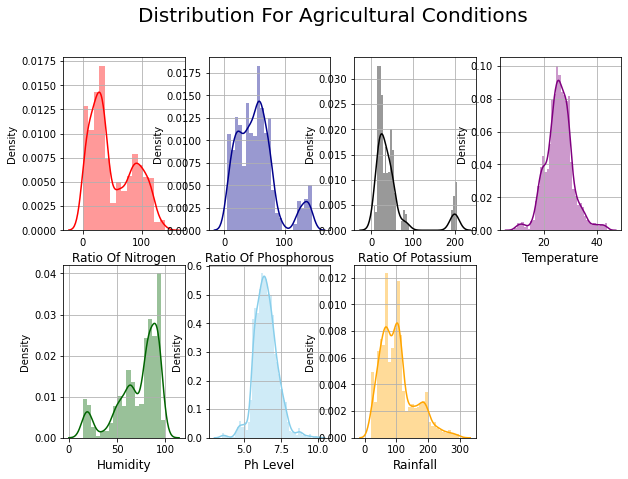

In [125]:
plt.figure(figsize=(10,7))
plt.subplot(2,4,1)
sns.distplot(data['N'],color='red')
plt.xlabel('Ratio Of Nitrogen', fontsize=12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(data['P'],color='darkblue')
plt.xlabel('Ratio Of Phosphorous', fontsize=12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(data['K'],color='black')
plt.xlabel('Ratio Of Potassium', fontsize=12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(data['temperature'],color='purple')
plt.xlabel('Temperature', fontsize=12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data['humidity'],color='darkgreen')
plt.xlabel('Humidity', fontsize=12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(data['ph'],color='skyblue')
plt.xlabel('Ph Level', fontsize=12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(data['rainfall'],color='orange')
plt.xlabel('Rainfall', fontsize=12)
plt.grid()

plt.suptitle('Distribution For Agricultural Conditions',fontsize=20)
plt.show()

In [128]:
## Using Filter Function
print('Some Interesting Patterns')
print('------------------------')
print('Crops which require very high ratio of nitrogen content in soil:',data[data['N']>120]['label'].unique())
print('Crops which require very high ratio of phosphorous content in soil:',data[data['P']>100]['label'].unique())
print('Crops which require very high ratio of potassium content in soil:',data[data['K']>200]['label'].unique())
print('Crops which require very high rainfall:',data[data['rainfall']>200]['label'].unique())
print('Crops which require very low temperature:',data[data['temperature']<10]['label'].unique())
print('Crops which require very high temperature:',data[data['temperature']>40]['label'].unique())
print('Crops which require very low humidity:',data[data['humidity']<20]['label'].unique())
print('Crops which require very low ph:',data[data['ph']<4]['label'].unique())
print('Crops which require very high ph:',data[data['ph']>9]['label'].unique())

Some Interesting Patterns
------------------------
Crops which require very high ratio of nitrogen content in soil: ['cotton']
Crops which require very high ratio of phosphorous content in soil: ['grapes' 'apple']
Crops which require very high ratio of potassium content in soil: ['grapes' 'apple']
Crops which require very high rainfall: ['rice' 'papaya' 'coconut']
Crops which require very low temperature: ['grapes']
Crops which require very high temperature: ['grapes' 'papaya']
Crops which require very low humidity: ['chickpea' 'kidneybeans']
Crops which require very low ph: ['mothbeans']
Crops which require very high ph: ['mothbeans']


In [130]:
# Let's understand which crops can only be grown in summer season,winter season and rainy season.
print('Summer Crops')
print(data[(data['temperature']>30)&(data['humidity']>50)]['label'].unique())
print('-------------------------------------------------')
print('Winter Crops')
print(data[(data['temperature']<20)&(data['humidity']>30)]['label'].unique())
print('-------------------------------------------------')
print('Rainy Crops')
print(data[(data['rainfall']>200)&(data['humidity']>30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-------------------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-------------------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


# Clustering

#### Clustering analysis is a technique that is used to classified data points in to relative groups. we can assign similar data points in one group. same as we can build different different groups. clustering analysis can be count in unsupervised category. That means we can train our model without labels.

In [131]:
from sklearn.cluster import KMeans

#removing the labels column
x=data.drop(['label'],axis=1)

#selecting all the values of the data
x=x.values

#checking the shape
print(x.shape)

(2200, 7)


#### To perform cluster analysisi first thing is that we have to know that there is how many clusters and how many clusters we need so for this we will use Elbow method.
##### Elbow method is way from that we can find how many clusters our model required, in this method we will plot no. of clusters with errors and find the Elbow. At which no. we will find the elbow that no. of clusters will be optimum for our model .(Elbow is a slite band).

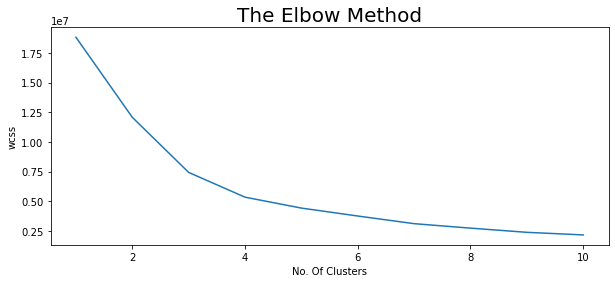

In [134]:
# Let's determine the optimum no. of clusters within dataset

plt.rcParams['figure.figsize']=(10,4)
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
    
#Let's plot the results
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('No. Of Clusters')
plt.ylabel('wcss')
plt.show()

#### So here is two elbow points one is on 3 and second is on 4.
__ques:- Which one should we choose?__
- ans:- Simply the last one we will choose which is 4.

### Now we will impliment clustering so in this first of all we will specify KMeans function and in that we will define compulsory parameter N with the optimal no. of clusters.

In [143]:
# Let's implement the K Means algorithm to perform clustering analysis.
km=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=km.fit_predict(x)

#Let's find out the results
a=data['label']
y_means=pd.DataFrame(y_means)
z=pd.concat([y_means,a],axis=1)
z=z.rename(columns={0:'cluster'})

#let's clusters of each crops
print("Let's check the results after applying the KMeans clustering analysis \n")
print('crops in first cluster:',z[z['cluster']==0]['label'].unique())
print('---------------------------------------------------------')
print('crops in second cluster:',z[z['cluster']==1]['label'].unique())
print('---------------------------------------------------------')
print('crops in third cluster:',z[z['cluster']==2]['label'].unique())
print('---------------------------------------------------------')
print('crops in fourth cluster:',z[z['cluster']==3]['label'].unique())


Let's check the results after applying the KMeans clustering analysis 

crops in first cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
---------------------------------------------------------
crops in second cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
---------------------------------------------------------
crops in third cluster: ['grapes' 'apple']
---------------------------------------------------------
crops in fourth cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']


#  Predictive Model
### Predictive model says us the sutaible crops for every specific conditions and for making this predictice model we will use machine learning model for train the dataset. 
#### Predictive modeling is also a part of AI . In any predictiive model we will make a model by using our dataset and finally when the model will train at that time we make the predictions for unseen data by using that model.
#### In the whole process machine learning model will make the decisions rules from the data with the help of every patterns &trends which are very helpful in the final predictions.


## How can you trust a model that gives us right predictions?
### To check the model perfomance we have many differents types of evaluation matrixes. With the help of these matrixes we can find how much accurate is our model and how much trust we can on our model.


## Evaluation Matrix:-
### We use the evaluation matrix to analysis the perfomance and trust of our model. Evaluation matrix gives us a accuracy score and with the help of that score we can understand how much our model is accurate.

In [144]:
# Let's drop the label from dataset
y=data['label']
x=data.drop(['label'],axis=1)
print('shape of x:',x.shape)
print('shape of y:',y.shape)


shape of x: (2200, 7)
shape of y: (2200,)


In [150]:
#let's create training and testing sets for vaildation of results
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

print('The shape of x train:',x_train.shape)
print('The shape of x test:',x_test.shape)
print('The shape of y train:',y_train.shape)
print('The shape of y test:',y_test.shape)


The shape of x train: (1760, 7)
The shape of x test: (440, 7)
The shape of y train: (1760,)
The shape of y test: (440,)


Here 0.2 is use for spliting the data into 80:20 ratio that means 80% data will go in train dataset and 20% data will go in th test dataset.

In [158]:
#let's create a predictive model 
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model=model.fit(x_train,y_train)
y_pred=model.predict(x_test)

C:\Users\Navikaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


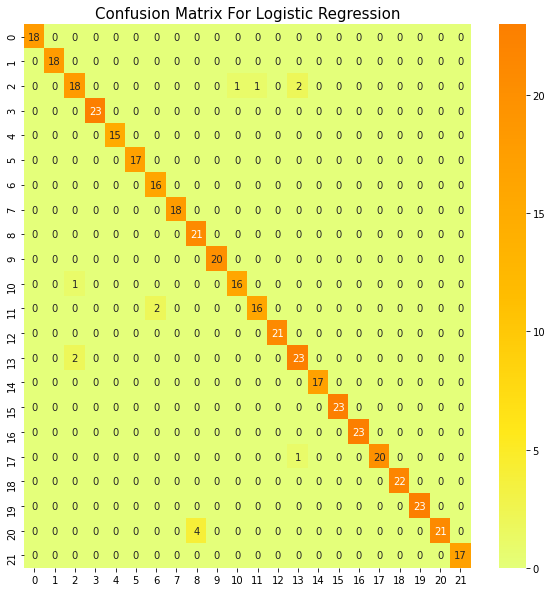

In [159]:
#Let's check the accuracy of model
#First we will do prediction on test data
#Let's calculate the model perfomance
from sklearn.metrics import confusion_matrix

#Let's print the confusion matrix first
plt.rcParams['figure.figsize']=(10,10)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap="Wistia")
plt.title('Confusion Matrix For Logistic Regression',fontsize=15)
plt.show()

In [164]:
# let's print the classification report also
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In this precision values and recall values of all crops are very high that means our model is very accurate.

In [167]:
#let's check the head of the dataset
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [171]:
prediction=model.predict((np.array([[90,
                                    42,
                                    43,
                                    20,
                                    80,
                                    7,
                                    200]])))
print('The suggested crop for given climatic condition is:',prediction)

The suggested crop for given climatic condition is: ['rice']
